## Importing Libraries and Data

In [563]:
# import warnings
# warnings.filterwarnings('ignore')

In [564]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [565]:
df1 = pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [566]:
df1.shape

(13320, 9)

## Data Preprocessing

'Area Type' Column Values

In [567]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

'Availability' Column Values

In [568]:
df1.groupby('availability')['availability'].agg('count')

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64

'Society' Column Values

In [569]:
df1.groupby('society')['society'].agg('count')

society
3Codeli    2
7 ise P    1
A idse     2
A rtsai    1
ACersd     1
          ..
Zonce E    2
Zostaa     3
i1ncyRe    1
i1odsne    1
i1rtsCo    3
Name: society, Length: 2688, dtype: int64

Distribution of Null Values

In [570]:
df1.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

'Balcony' Column Values

In [571]:
df1.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [572]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Dropping features which are not necessary

In [573]:
df1.drop(['availability','society','balcony','area_type'], axis='columns', inplace=True)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


Dropping Null(NaN) values

In [574]:
# df2 = df1.dropna(subset=df1.columns.difference(['balcony']))
# df2.isnull().sum()

df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [575]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Handling Inconsistencies

In [576]:
df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))
df2.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_4844\1989152296.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [577]:
# Function for checking float values
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [578]:
df2[~df2['total_sqft'].apply(is_float)].head(30)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [579]:
# import re

# # Conversion function
# def convert_to_sqft(value):
#     try:
#         # Check if the value is a range
#         if '-' in value:
#             parts = value.split('-')
#             return (float(parts[0]) + float(parts[1])) / 2
        
#         # Check for different units and convert to square feet
#         if 'Sq. Meter' in value:
#             match = re.findall(r"\d+\.?\d*", value)
#             return float(match[0]) * 10.7639 if match else np.nan
#         if 'Perch' in value:
#             match = re.findall(r"\d+\.?\d*", value)
#             return float(match[0]) * 272.25 if match else np.nan
#         if 'Sq. Yards' in value:
#             match = re.findall(r"\d+\.?\d*", value)
#             return float(match[0]) * 9 if match else np.nan
#         if 'Acres' in value:
#             match = re.findall(r"\d+\.?\d*", value)
#             return float(match[0]) * 43560 if match else np.nan
        
#         # Assume the value is in square feet if no unit is specified
#         return float(value)
#     except Exception as e:
#         print(f"Error processing value: {value}, Error: {e}")
#         return np.nan

In [580]:
# # Apply the conversion function to 'total_sqft' column
# df2['total_sqft'] = df2['total_sqft'].apply(lambda x: convert_to_sqft(str(x)))

# # Now you can access the DataFrame directly
# df2.head()

In [581]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [582]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

In [583]:
df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)
df2 = df2[df2.total_sqft.notnull()]

C:\Users\Asus\AppData\Local\Temp\ipykernel_4844\2798838278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)


In [ ]:
df2.loc[648]

In [585]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [586]:
df2.dropna(subset=['total_sqft'], inplace=True)
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [588]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [589]:
len(df3.location.unique())

1298

In [590]:
df3.location = df3.location.apply(lambda x : x.strip())

location_values = df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_values

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [591]:
len(location_values[location_values <= 10])

1047

In [592]:
location_values_less_10 = location_values[location_values <= 10]

df3.location = df3.location.apply(lambda x : 'Other' if x in location_values_less_10 else x)
len(df3.location.unique())

241

### Outlier Removal

#### Using Business Logic

In [593]:
df3[df3.total_sqft/df3.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [594]:
df3.shape

(13200, 7)

In [595]:
df4 = df3[~(df3.total_sqft/df3.bhk < 300)]
df4.shape

(12456, 7)

#### Using Mean & Standard Deviation

In [596]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [597]:
def remove_price_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        mn = subdf.price_per_sqft.mean()
        sd = subdf.price_per_sqft.std()
        filtered_df = subdf[(subdf.price_per_sqft>(mn-sd)) & (subdf.price_per_sqft <=(mn+sd))]
        df_out = pd.concat([df_out, filtered_df], ignore_index=True)
    return df_out

In [598]:
df5 = remove_price_outliers(df4)
df5.shape

(10293, 7)

In [599]:
def plot_scatterchart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (10,6)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh. Indian Rupees)")
    plt.title(location)
    plt.legend()

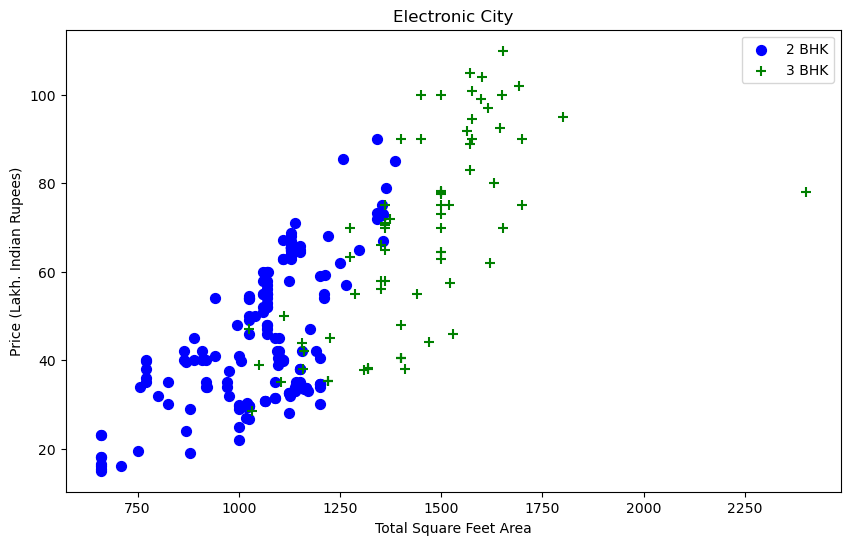

In [600]:
plot_scatterchart(df5,"Electronic City")

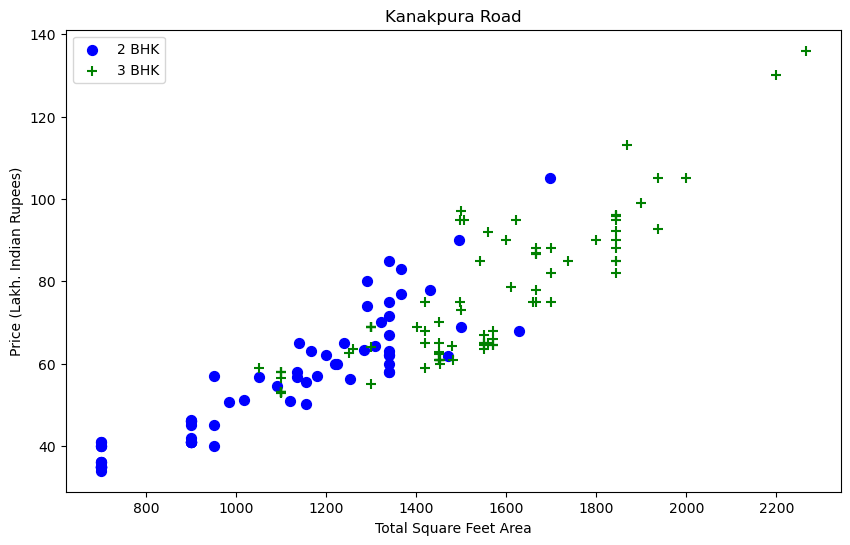

In [601]:
plot_scatterchart(df5,"Kanakpura Road")

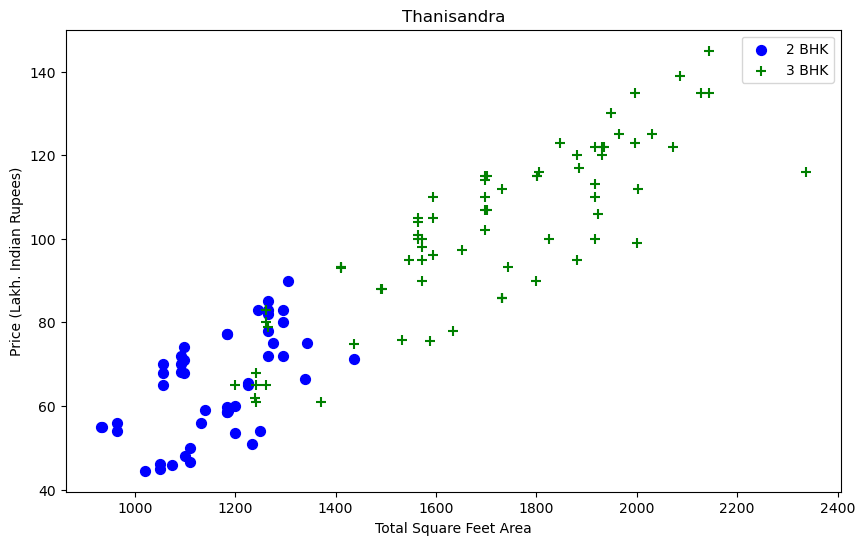

In [602]:
plot_scatterchart(df5,"Thanisandra")

In [603]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : bhk_df.price_per_sqft.mean(),
                'std' : bhk_df.price_per_sqft.std(),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [604]:
df6 = remove_bhk_outliers(df5)
df6.shape

(7365, 7)

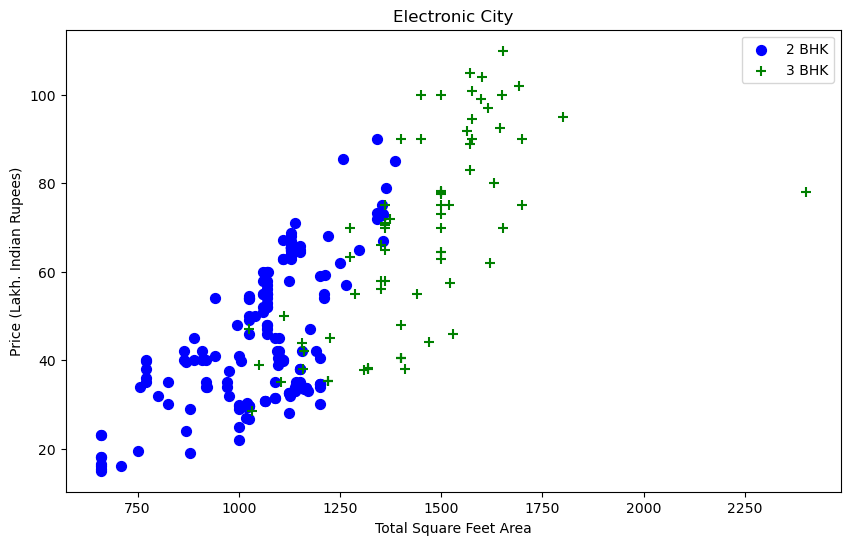

In [605]:
plot_scatterchart(df5,"Electronic City")

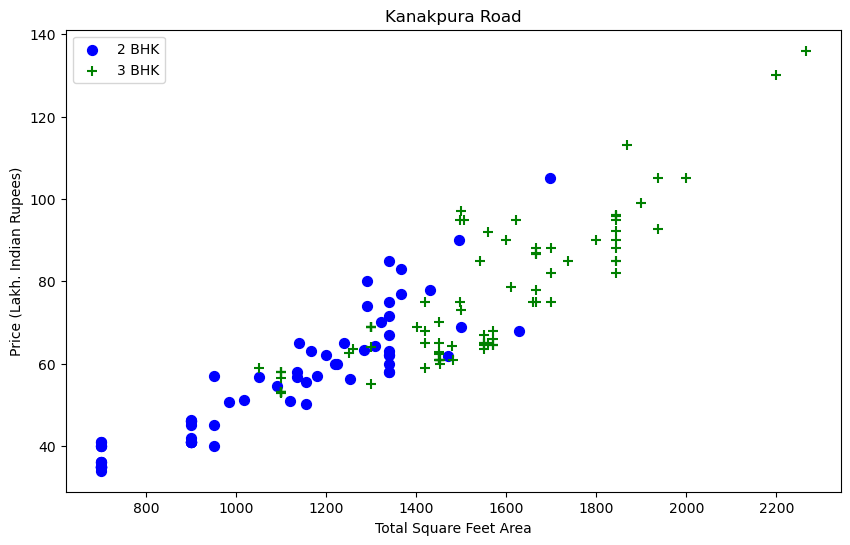

In [606]:
plot_scatterchart(df5,"Kanakpura Road")

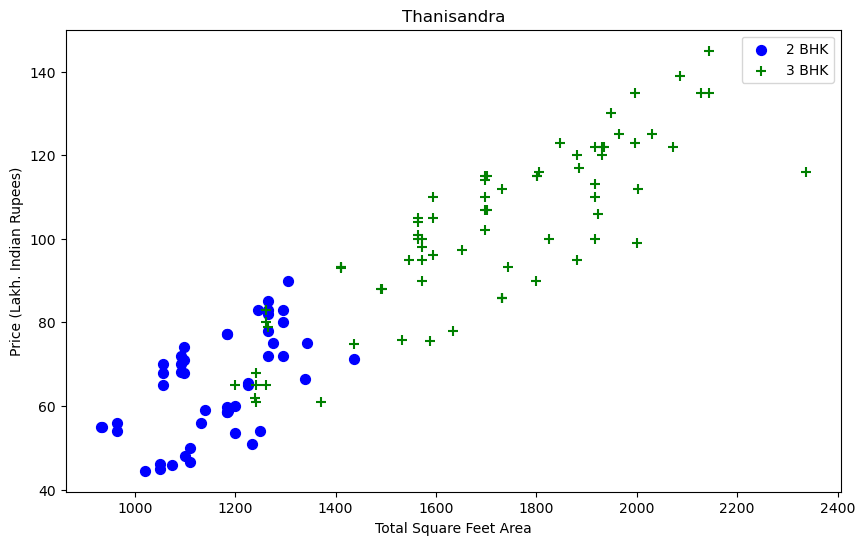

In [607]:
plot_scatterchart(df5,"Thanisandra")

#### Using 'Bathrooms' feature

In [608]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

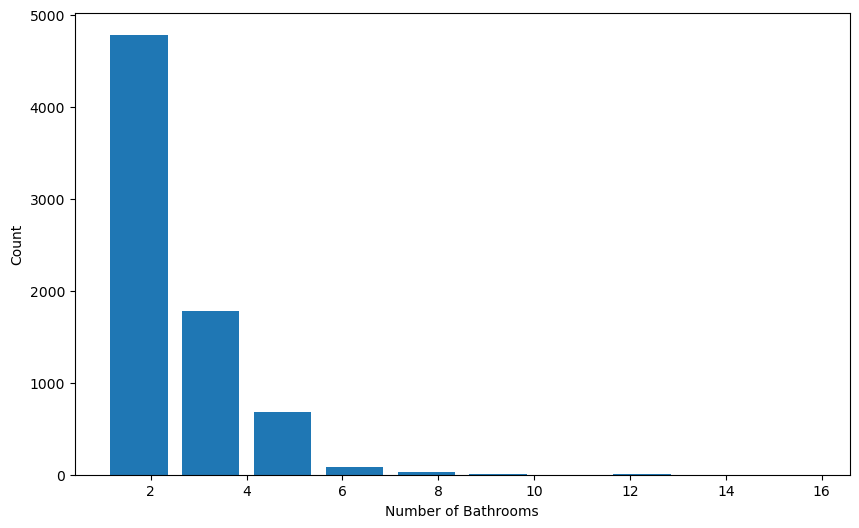

In [609]:
plt.hist(df6.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [610]:
df6[df6.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5312,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5962,Other,10 BHK,12000.0,12.0,525.0,10,4375.000000
6051,Other,16 BHK,10000.0,16.0,550.0,16,5500.000000
6786,Other,11 BHK,6000.0,12.0,150.0,11,2500.000000
7117,Other,13 BHK,5425.0,13.0,275.0,13,5069.124424


It's unusual to have 2 more bathrooms than the number of bedrooms

In [611]:
df6[df6.bath > df6.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5273,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5887,Other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9063,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [612]:
df7 = df6[df6.bath < df6.bhk+2]
df7.shape

(7286, 7)

In [613]:
df7.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

### One-Hot Encoding

In [614]:
location_dummies = pd.get_dummies(df7.location)
location_dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [615]:
# area_dummies = pd.get_dummies(df7.area_type)
# area_dummies.head()

In [616]:
# df8 = pd.concat([df7, location_dummies.drop('Other', axis='columns'), area_dummies.drop('Plot  Area', axis='columns')], axis='columns')
# df8.head()

df8 = pd.concat([df7, location_dummies.drop('Other', axis='columns')], axis='columns')
df8.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [617]:
df9 = df8.drop(['location', 'size', 'price_per_sqft'], axis='columns')
df9.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [618]:
df9.shape

(7286, 244)

In [619]:
df9.isnull().sum()

total_sqft             0
bath                   0
price                  0
bhk                    0
1st Block Jayanagar    0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 244, dtype: int64

## Model Building

In [620]:
X = df9.drop(['price'], axis='columns')
y = df9.price

In [621]:
X.isnull().sum()

total_sqft             0
bath                   0
bhk                    0
1st Block Jayanagar    0
1st Phase JP Nagar     0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 243, dtype: int64

### Find Best Model

In [623]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_model(X,y):
    models = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params' : {
                'fit_intercept' : [True, False]
            }
        },
        'lasso' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'decision_tree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['squared_error', 'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=12)
    for model_name, config in models.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model' : model_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [624]:
find_model(X, y)

,model,best_score,best_params
0,linear_regression,0.822476,{'fit_intercept': False}
1,lasso,0.693265,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.689662,"{'criterion': 'squared_error', 'splitter': 'ra..."


### Linear Regression

In [629]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [630]:
lr_model = LinearRegression(fit_intercept=False)
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8878534893059876

In [632]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
r2 = r2_score(y_test, lr_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 16.907690065130893
Mean Squared Error: 1001.2143368607655
R² Score: 0.8878534893059876


#### Cross Validation

In [627]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cv_scores = cross_val_score(LinearRegression(), X, y, cv=cv)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.77260889 0.85694909 0.85103777 0.85683826 0.81469601]
Mean cross-validation score: 0.8304260024377736
